**Exploratory Data Analysis of Clinic Performance**

*The objective of this project is to analyze the operational and financial performance of a hospital management system to identify key trends and provide data-driven recommendations for growth and efficiency.*

In [37]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import duckdb
import sqlalchemy

In [38]:
# For appointments table
appointments = pd.read_csv(r"appointments.csv")
appointments.shape
appointments["appointment_date"] = pd.to_datetime(appointments["appointment_date"])
appointments['appointment_time'] = pd.to_datetime(appointments["appointment_time"])
appointments.info()
appointments.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   appointment_id    200 non-null    object        
 1   patient_id        200 non-null    object        
 2   doctor_id         200 non-null    object        
 3   appointment_date  200 non-null    datetime64[ns]
 4   appointment_time  200 non-null    datetime64[ns]
 5   reason_for_visit  200 non-null    object        
 6   status            200 non-null    object        
dtypes: datetime64[ns](2), object(5)
memory usage: 11.1+ KB


C:\Users\91852\AppData\Local\Temp\ipykernel_18012\312236980.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  appointments['appointment_time'] = pd.to_datetime(appointments["appointment_time"])


,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status
0,A001,P034,D009,2023-08-09,2025-10-16 15:15:00,Therapy,Scheduled


In [39]:
# For billing table
billing = pd.read_csv(r"billing.csv")
billing.shape
billing["bill_date"] = pd.to_datetime(billing["bill_date"])
billing.info()
billing.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   bill_id         200 non-null    object        
 1   patient_id      200 non-null    object        
 2   treatment_id    200 non-null    object        
 3   bill_date       200 non-null    datetime64[ns]
 4   amount          200 non-null    float64       
 5   payment_method  200 non-null    object        
 6   payment_status  200 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 11.1+ KB


np.int64(0)

In [40]:
# For doctors table
doctors = pd.read_csv(r"doctors.csv")
doctors.shape
doctors.info()
doctors.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   doctor_id         10 non-null     object
 1   first_name        10 non-null     object
 2   last_name         10 non-null     object
 3   specialization    10 non-null     object
 4   phone_number      10 non-null     int64 
 5   years_experience  10 non-null     int64 
 6   hospital_branch   10 non-null     object
 7   email             10 non-null     object
dtypes: int64(2), object(6)
memory usage: 772.0+ bytes


np.int64(0)

In [41]:
# For patients table
patients = pd.read_csv(r"patients.csv")
patients.shape
patients.head(1)
patients["date_of_birth"] = pd.to_datetime(patients["date_of_birth"])
patients["registration_date"] = pd.to_datetime(patients["registration_date"])
patients.info()
patients.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          50 non-null     object        
 1   first_name          50 non-null     object        
 2   last_name           50 non-null     object        
 3   gender              50 non-null     object        
 4   date_of_birth       50 non-null     datetime64[ns]
 5   contact_number      50 non-null     int64         
 6   address             50 non-null     object        
 7   registration_date   50 non-null     datetime64[ns]
 8   insurance_provider  50 non-null     object        
 9   insurance_number    50 non-null     object        
 10  email               50 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 4.4+ KB


np.int64(0)

In [42]:
# for treatments table
treatments = pd.read_csv(r"treatments.csv")
treatments.shape
treatments["treatment_date"] = pd.to_datetime(treatments["treatment_date"])
treatments.tail(2)
treatments.info()
treatments.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   treatment_id    200 non-null    object        
 1   appointment_id  200 non-null    object        
 2   treatment_type  200 non-null    object        
 3   description     200 non-null    object        
 4   cost            200 non-null    float64       
 5   treatment_date  200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 9.5+ KB


np.int64(0)

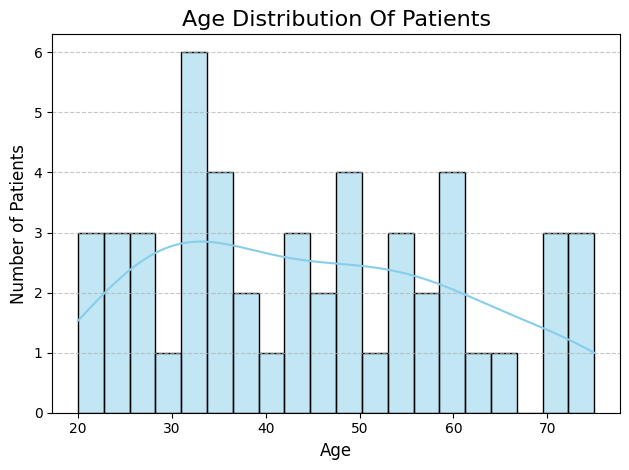

In [43]:
# What is the age distribution of the patients?

import duckdb

query = """
    SELECT EXTRACT(YEAR FROM AGE(Current_date, date_of_birth)) AS age
    FROM patients
"""
age_distribution = duckdb.query(query).df()

# For hisplot

plt.Figure(figsize=(12,7))
sns.histplot(age_distribution["age"], bins=20, kde= True, color="skyblue")

plt.title("Age Distribution Of Patients", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


*The chart shows that most patients are between 25 and 35 years old, with a noticeable peak around age 30. The number of patients gradually decreases with age, showing fewer individuals above 60*

**Actionable Recommendations:**

**Target New Demographics:** *Develop and market services specifically for older age groups, such as geriatric wellness programs, chronic disease management (e.g., for diabetes, hypertension), and specialized orthopedic care.*

**Enhance Services for Young Adults:** *Since this is your core demographic, expand services they value, such as mental health support (therapy), wellness checkups, and family planning.*

**Digital Engagement:** *Utilize social media and digital marketing to engage this younger audience with health tips, online booking, and telehealth options.*



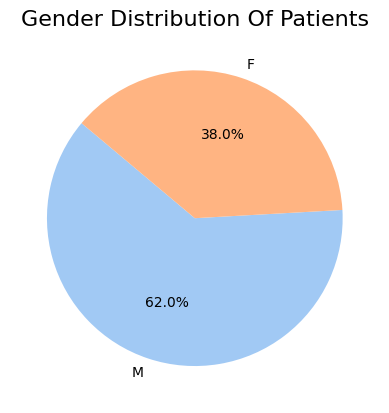

In [44]:
# What is the gender distribution of patients?

import duckdb

query = """ 
    SELECT Gender AS gender,
    COUNT(patient_id) AS number_of_patients
    FROM patients
    GROUP BY 1
    ORDER BY 2 DESC
"""
gender_df = duckdb.query(query).df()

# For pie chart

plt.Figure(figsize=(8,8))
plt.pie(
    gender_df["number_of_patients"],
    labels=gender_df["gender"],
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("pastel")
)

plt.title("Gender Distribution Of Patients", fontsize=16)
plt.ylabel("")
plt.show()

*The chart shows that male patients (62%) make up a larger share of the total, while female patients (38%) represent a smaller portion, indicating a moderate gender imbalance in the dataset*

**Actionable Recommendations:**

**Launch Women's Health Initiatives:** *Create and promote a dedicated women's health wing. Market services like gynecology, obstetrics, mammography screenings, and hormonal wellness programs.*

**Targeted Marketing:** *Run marketing campaigns specifically aimed at women, highlighting female doctors on your staff and creating a welcoming and safe environment for women's healthcare needs.*



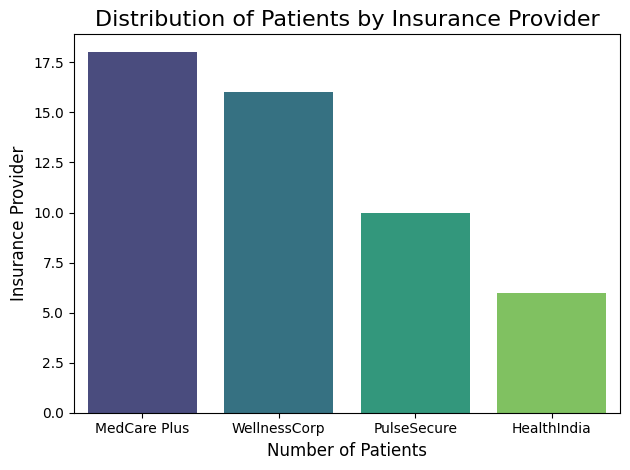

In [45]:
# Which insurance providers are most common among patients?

import duckdb

query = """ 
    SELECT insurance_provider AS insurance_provider,
    COUNT(patient_id) AS number_of_patients
    FROM patients
    GROUP BY 1
    ORDER BY 2 DESC
"""

insurnace_df = duckdb.query(query).df()

# For barplot

plt.Figure(figsize=(12,8))
sns.barplot(
    x="insurance_provider",
    y="number_of_patients",
    data=insurnace_df,
    palette="viridis"
)

plt.title("Distribution of Patients by Insurance Provider", fontsize=16)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Insurance Provider', fontsize=12)
plt.tight_layout()
plt.show()



*MedCare Plus is clearly the most popular insurance provider among patients by a significant margin. The other three providers have a much smaller and relatively similar number of patients*

**Actionable Recommendations:**

**Strengthen Key Partnership:** *Nurture your relationship with MedCare Plus through preferred provider agreements and collaborative wellness campaigns.*

**Expand Insurance Network:** *Actively work to become an in-network provider for the other insurance companies. This is a direct channel to a larger pool of potential patients.*

**Promote Accepted Insurances:** *Clearly advertise on your website and marketing materials all the insurance providers you accept to attract patients covered by them*





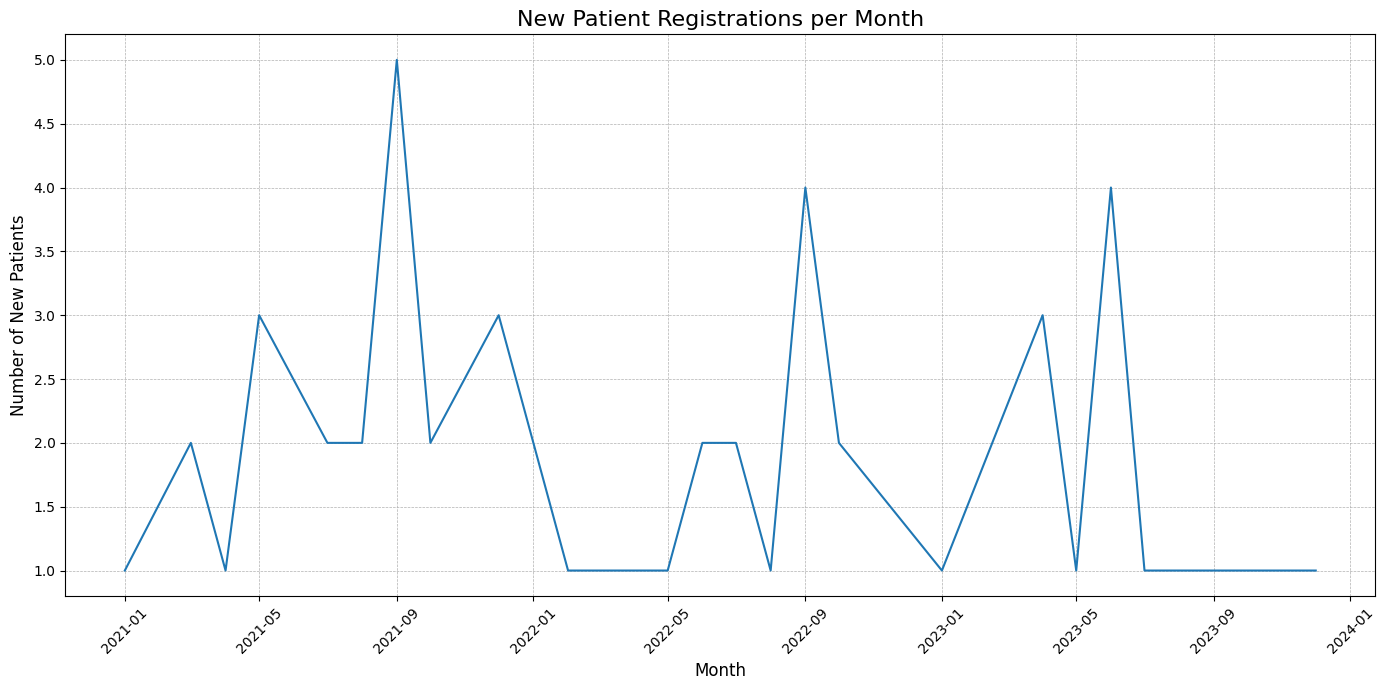

In [46]:
#  What is the number of new patient registrations per month?

import duckdb

query = """ 
    SELECT DATE_TRUNC('Month', registration_date):: DATE AS registration_month,
    COUNT(patient_id) AS number_of_registrations
    FROM patients
    GROUP BY 1
    ORDER BY 2 ASC
"""
registration_df = duckdb.query(query).df()

# For lineplot

plt.figure(figsize=(14,7))
sns.lineplot(
    x="registration_month",
    y="number_of_registrations",
    data=registration_df,
    markers="o",
    linestyle="-"
)

plt.title('New Patient Registrations per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of New Patients', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*It looks like new patient registrations have been steadily growing over these months, which is a positive trend. There might be a slight dip in the last month, but the overall momentum seems strong.*

**Actionable Recommendations:**

**Analyze Success:** *Identify what marketing or operational strategies were implemented during the high-growth months and replicate them.*

**Referral Program:** *Launch a patient referral program where existing patients receive a discount or benefit for referring new patients. This leverages your growing patient base for further expansion*





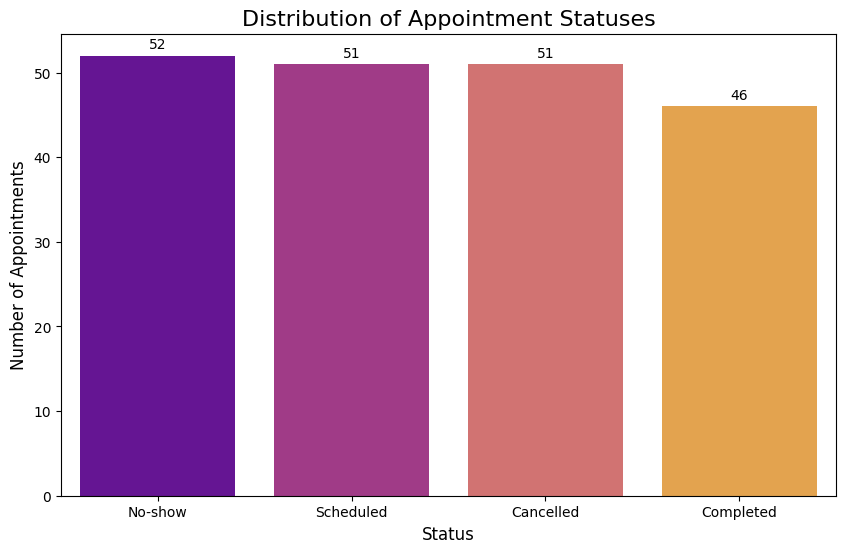

In [47]:
# What is the distribution of appointment statuses?

import duckdb

query = """ 
    SELECT status AS status,
    COUNT(appointment_id) AS number_of_appointments
    FROM appointments
    GROUP BY 1
    ORDER BY 2 DESC
"""

status_df = duckdb.query(query).df()

# For barplot

plt.figure(figsize=(10, 6))
ax = sns.barplot(
        x='status',
        y='number_of_appointments',
        data=status_df,
        palette='plasma'
    )

for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.title('Distribution of Appointment Statuses', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.show()

*The chart shows that most appointments ended up as No-shows (52), followed closely by Scheduled (51) and Cancelled (51) ones. Completed (46) appointments are the fewest, suggesting there’s room to improve follow through and reduce missed appointments.*

**Actionable Recommendations:**

**Implement a Reminder System:** *Use automated SMS and email reminders for upcoming appointments (e.g., 48 hours and 24 hours before).*

**Introduce a Cancellation Policy:** *Implement a clear policy, such as a fee for no-shows or cancellations within 24 hours of the appointment time. This discourages last-minute changes.*

**Offer Telehealth:** *Provide telehealth options for follow-ups and consultations. The convenience can significantly reduce cancellations and no-shows.*

**Optimize Scheduling:** *Allow for easier rescheduling options online to encourage patients to move their appointment rather than cancel it outright.*




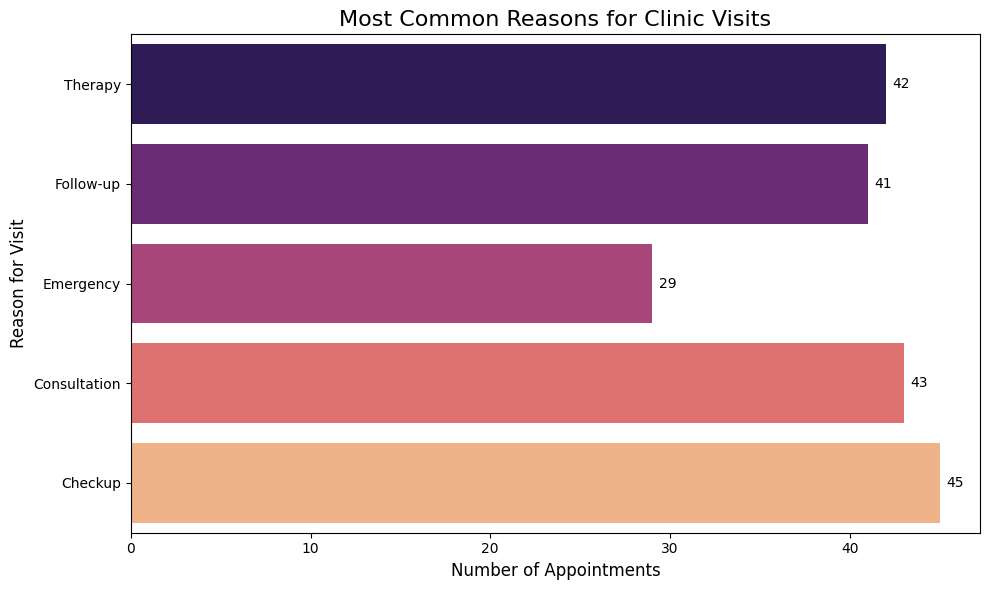

In [48]:
# What are the most common reasons for visiting the clinic?

query = """ 
    SELECT reason_for_visit,
    COUNT(appointment_id) AS number_of_appointments
    FROM appointments
    GROUP BY 1
    ORDER BY 1 DESC
"""

visit_df = duckdb.query(query).df()

# For barplot

plt.figure(figsize=(10, 6))
ax = sns.barplot(
        x='number_of_appointments',
        y='reason_for_visit',
        data=visit_df,
        palette='magma'
    )

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=5, color='black')

plt.title('Most Common Reasons for Clinic Visits', fontsize=16)
plt.xlabel('Number of Appointments', fontsize=12)
plt.ylabel('Reason for Visit', fontsize=12)
plt.tight_layout()
plt.show()


*The chart shows that Checkups (45) and Consultations (43) are the most common reasons for visiting the clinic, followed closely by Therapy (42) and Follow-ups (41). Emergency visits (29) are the least frequent, indicating most visits are planned rather than urgent*

**Actionable Recommendations:**

**Create Health Packages:** *Bundle services into attractive annual or semi-annual "Wellness Checkup" packages for individuals and families.*

**Streamline Follow-ups:** *Ensure a seamless follow-up process. Use the appointment data to proactively schedule follow-up visits for patients, improving retention and continuity of care.*

**Promote Specializations:** *Market your consultation and therapy services by highlighting the expertise of your doctors in those fields.*


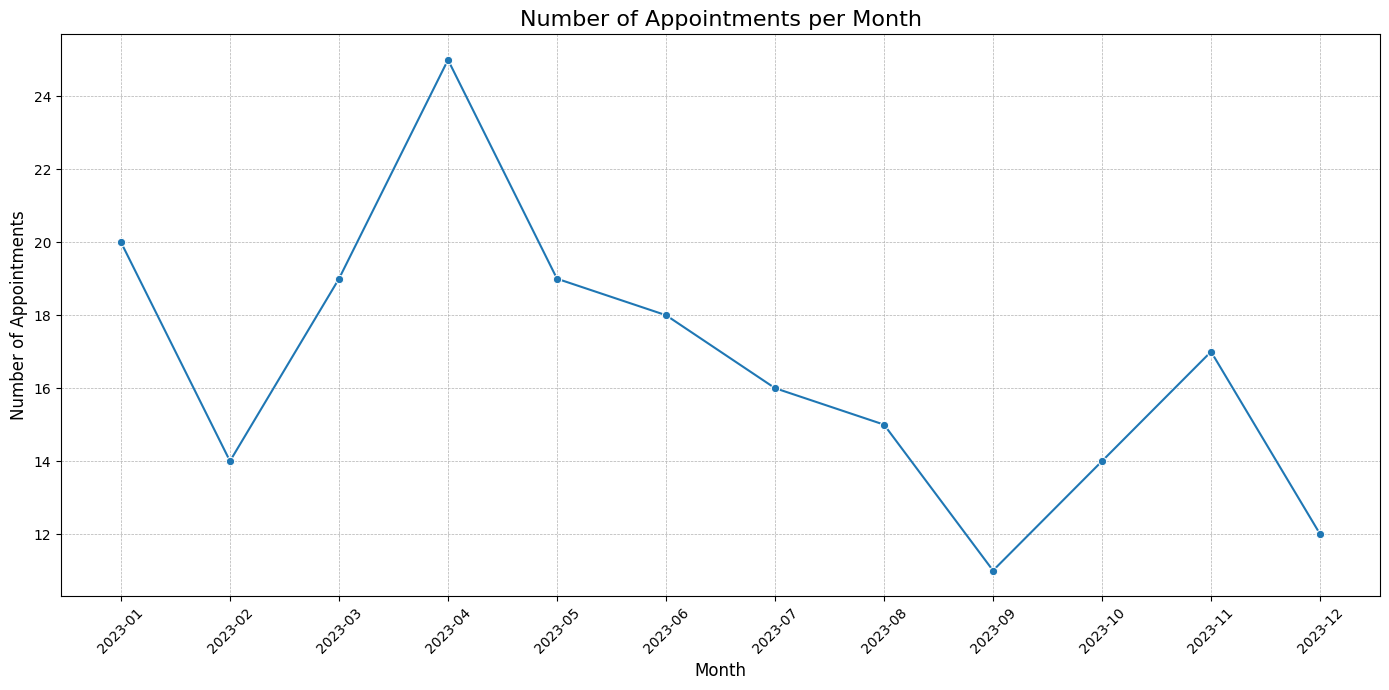

In [49]:
# What are the busiest months for appointments?

query = """ 
    SELECT STRFTIME(appointment_date, '%Y-%m') AS appointment_month,
    COUNT(appointment_id) AS number_of_appointments
    FROM appointments
    GROUP BY appointment_month
    ORDER BY appointment_month
"""
appointments_df = duckdb.query(query).df()
appointments_df

plt.figure(figsize=(14, 7))
ax = sns.lineplot(
    x='appointment_month',
    y='number_of_appointments',
    data=appointments_df,
    marker='o',
    linestyle='-'
)

plt.title('Number of Appointments per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*The chart shows that clinic appointments peaked in April (25 appointments) and were lowest in September (11 appointments). Overall, there’s a gradual decline in appointments through the middle of the year, followed by a small rise toward November before dipping again in December*

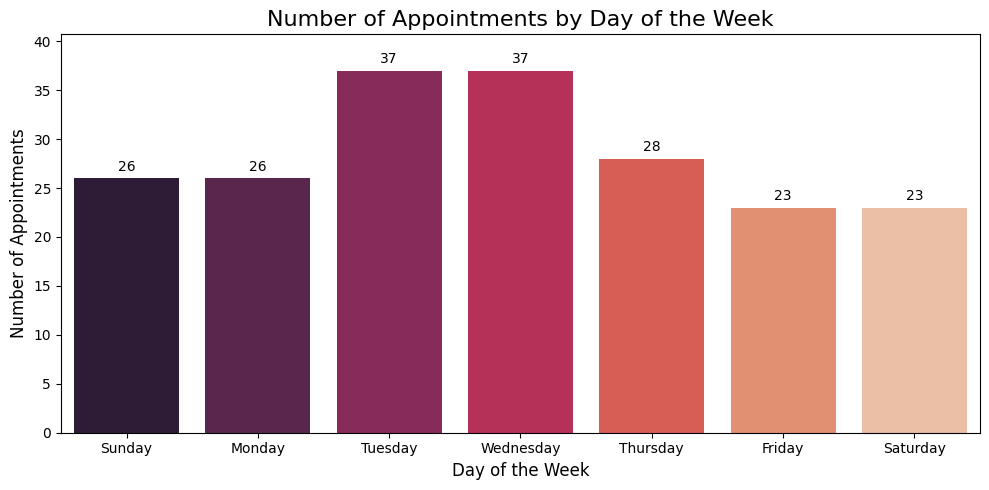

,day_of_week,number_of_appointments
0,Sunday,26
1,Monday,26
2,Tuesday,37
3,Wednesday,37
4,Thursday,28
5,Friday,23
6,Saturday,23


In [60]:
# Which day of the week has the most appointments?

query = """
    SELECT DAYNAME(appointment_date) AS day_of_week,
    COUNT(appointment_id) AS number_of_appointments
    FROM appointments
    GROUP BY day_of_week, DAYOFWEEK(appointment_date)
    ORDER BY DAYOFWEEK(appointment_date);
"""

daily_appointments_df = duckdb.query(query).df()

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='day_of_week',
    y='number_of_appointments',
    data=daily_appointments_df,
    palette='rocket'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.title('Number of Appointments by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12) 
ax.set_ylim(0, daily_appointments_df['number_of_appointments'].max() * 1.1)
plt.tight_layout()
plt.show()

daily_appointments_df

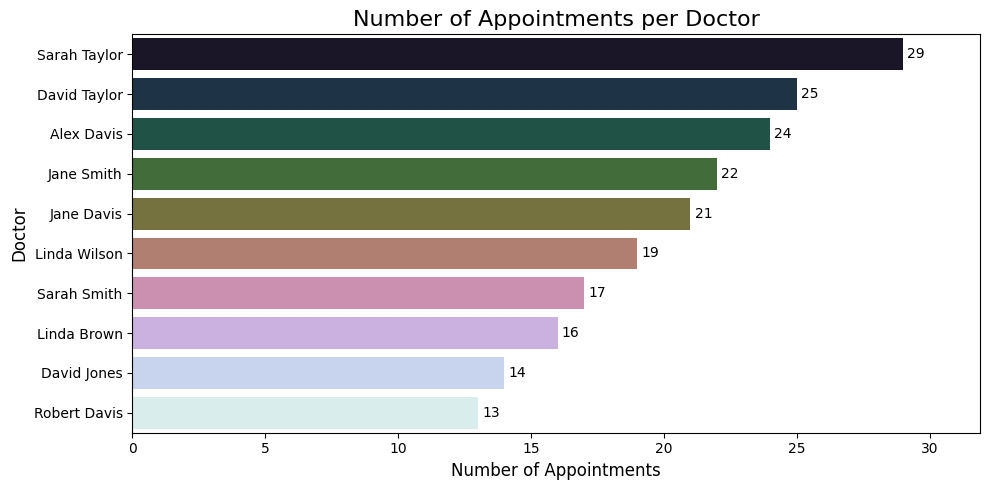

In [59]:
# Which doctors have the most appointments?

query = """ 
    SELECT CONCAT(D.first_name,' ',D.last_name) AS doctor_name,
    COUNT(A.appointment_id) AS number_of_appointments
    FROM doctors AS D
    INNER JOIN appointments AS A ON
    D.doctor_id = A.doctor_id
    GROUP BY 1
    ORDER BY 2 DESC
"""
doc_app = duckdb.query(query).df()

# For barpolt

plt.figure(figsize=(10,5))

ax = sns.barplot(
    x="number_of_appointments",
    y="doctor_name",
    data=doc_app,
    palette="cubehelix"
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.title('Number of Appointments per Doctor', fontsize=16)
plt.xlabel('Number of Appointments', fontsize=12)
plt.ylabel('Doctor', fontsize=12)
ax.set_xlim(0, doc_app['number_of_appointments'].max() * 1.1)
plt.tight_layout()
plt.show()


*The chart shows that Sarah Taylor handled the highest number of appointments (29), followed by David Taylor and Alex Davis. Overall, there’s a noticeable drop in appointments among the lower-ranked doctors, suggesting uneven workload distribution across the team.*

**Actionable Recommendations:**

**Balance Workload:** *Implement a scheduling system that helps distribute appointments more evenly among doctors to prevent burnout for high-demand specialists and better utilize all staff.*

**Promote Other Doctors:** *Market the expertise and availability of your other skilled doctors, especially in high-demand fields like Pediatrics and Dermatology.*

**Expand High-Demand Services:** *Since Pediatrics and Dermatology are your most popular services, consider expanding these departments by hiring more specialists or investing in advanced equipment to meet the demand and drive revenue growth.*



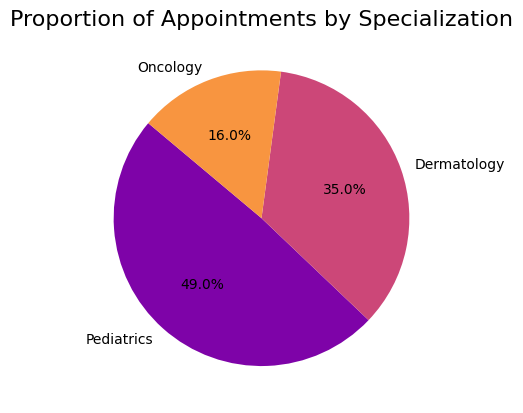

In [52]:
# What is the distribution of appointments across different doctor specializations?

query = """
    SELECT D.specialization AS specialization,
    COUNT(A.appointment_id) AS number_of_appointments
    FROM doctors AS D
    INNER JOIN appointments AS A ON
    D.doctor_id = A.doctor_id
    GROUP BY 1
    ORDER BY 2 DESC
"""

specialization_df = duckdb.query(query).df()

# For piechart

plt.Figure(figsize=(10,10))
plt.pie(
    specialization_df["number_of_appointments"],
    labels=specialization_df["specialization"],
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("plasma", len(specialization_df))
)
plt.title('Proportion of Appointments by Specialization', fontsize=16)
plt.ylabel('')

plt.show()


*This chart shows that Pediatrics accounts for nearly half of all appointments (49%), making it the most in-demand specialization. Dermatology follows with 35%, while Oncology has the smallest share at 16%, indicating fewer patient visits in that area*

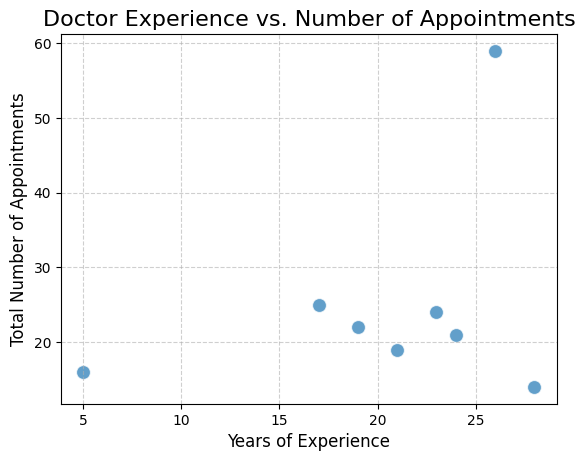

In [53]:
# Is there a relationship between a doctor's years of experience and the number of appointments they handle?

query = """
    SELECT D.years_experience,
    COUNT(a.appointment_id) AS number_of_appointments
    FROM doctors AS D
    INNER JOIN appointments AS A ON
    D.doctor_id = A.doctor_id
    GROUP BY 1
    ORDER BY 2 
"""
experience_df = duckdb.query(query).df()

# For scatter plot

plt.Figure(figsize=(12,7))
sns.scatterplot(
    x="years_experience",
    y="number_of_appointments",
    data=experience_df,
    s=100,
    alpha=0.7
)

plt.title('Doctor Experience vs. Number of Appointments', fontsize=16)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Total Number of Appointments', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

*The chart shows that there isn’t a strong correlation between a doctor’s experience and the number of appointments. While most doctors, regardless of experience, have similar appointment counts, one highly experienced doctor stands out with significantly more appointments than others.*

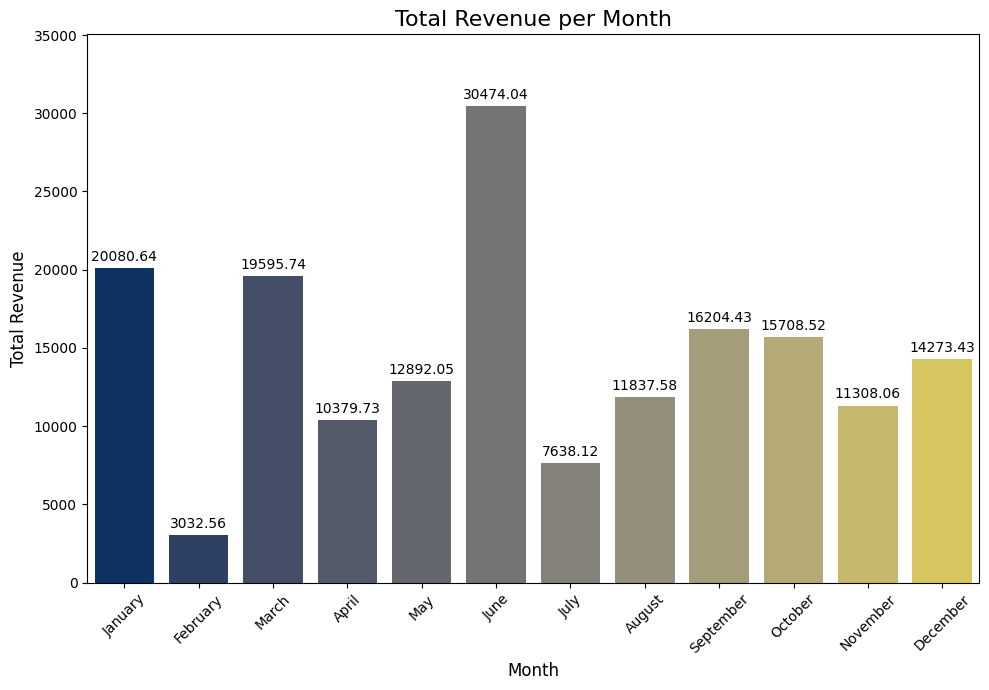

In [ ]:
# What is the total revenue generated per month?

query = """
    SELECT
        STRFTIME(bill_date, '%B') AS revenue_month_name,
        STRFTIME(bill_date, '%m') AS month_number,
        SUM(amount) AS total_revenue
    FROM
        billing
    WHERE
        payment_status = 'Paid'
    GROUP BY
        revenue_month_name, month_number
    ORDER BY
        month_number;
"""

monthly_revenue_df = duckdb.query(query).df()


plt.figure(figsize=(10, 7))
ax = sns.barplot(
    x='revenue_month_name',
    y='total_revenue',
    data=monthly_revenue_df,
    palette='cividis'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)


plt.title('Total Revenue per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
ax.set_ylim(0, monthly_revenue_df['total_revenue'].max() * 1.15)

plt.tight_layout()
plt.show()

*This chart highlights a year with significant fluctuations in revenue. June was an exceptionally strong month, reaching a peak of over $30,000, which is more than double most other months. In contrast, February saw a sharp dip in performance. Following the June peak, revenue stabilized to a more consistent level in the latter half of the year, ending on a solid note in December*

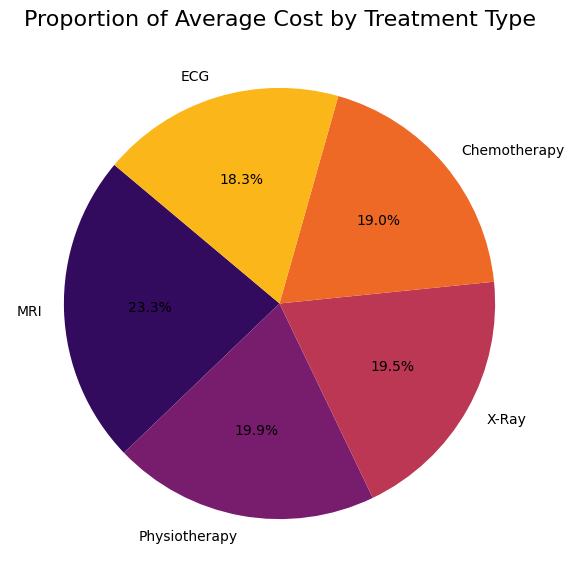

In [55]:
# What is the average cost per treatment type?

query = """ 
    SELECT treatment_type,
    AVG(cost) AS avg_cost
    FROM treatments
    GROUP BY 1
    ORDER BY 2 DESC
"""
treat_df = duckdb.query(query).df()

# For pie plot

plt.figure(figsize=(7, 7))
plt.pie(
    treat_df['avg_cost'],
    labels=treat_df['treatment_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('inferno', len(treat_df))
)

plt.title('Proportion of Average Cost by Treatment Type', fontsize=16)
plt.ylabel('')
plt.show()

*MRI stands out as the treatment with the highest average cost, accounting for 23.3% of the total. On the other end, ECG is the most affordable at 18.3%. It's interesting to note how closely clustered the costs for Chemotherapy, X-Ray, and Physiotherapy are, all falling within a narrow 1% range of each other*

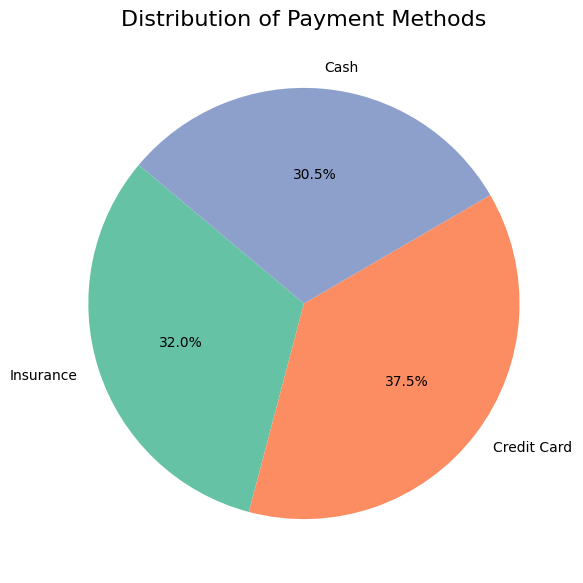

In [56]:
# What is the distribution of payment methods used by patients?

query = """
    SELECT payment_method,
    COUNT(bill_id) AS number_of_transactions
    FROM billing
    GROUP BY 1
    ORDER BY 1 DESC;
"""

payment_method_df = duckdb.query(query).df()


plt.figure(figsize=(7, 7))
plt.pie(
    payment_method_df['number_of_transactions'],
    labels=payment_method_df['payment_method'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2')
)

plt.title('Distribution of Payment Methods', fontsize=16)
plt.ylabel('')

plt.show()

*Credit Card is the most popular choice, used for 37.5% of transactions. However, Insurance (32.0%) and Cash (30.5%) are not far behind, indicating that customers have diverse preferences. Overall, there isn't one overwhelmingly dominant payment method; all three are clearly common and important.*

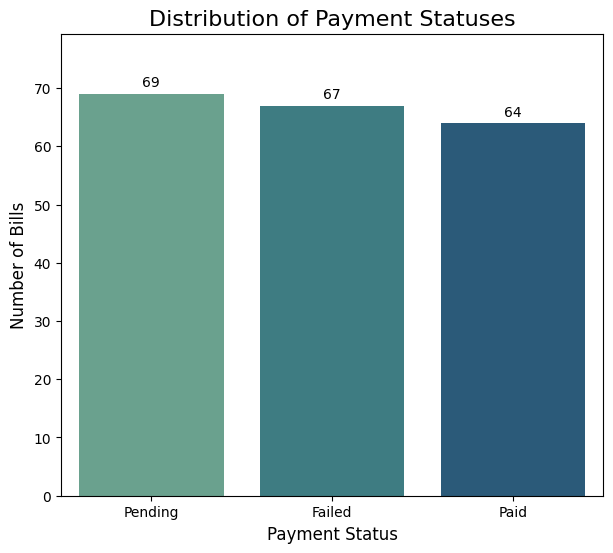

In [57]:
# What is the payment status distribution (Paid, Pending, Failed)?

query = """
    SELECT
        payment_status,
        COUNT(bill_id) AS number_of_bills
    FROM
        billing
    GROUP BY
        payment_status
    ORDER BY
        number_of_bills DESC;
"""

payment_status_df = duckdb.query(query).df()


plt.figure(figsize=(7, 6))
ax = sns.barplot(
    x='payment_status',
    y='number_of_bills',
    data=payment_status_df,
    palette='crest'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.title('Distribution of Payment Statuses', fontsize=16)
plt.xlabel('Payment Status', fontsize=12)
plt.ylabel('Number of Bills', fontsize=12)
ax.set_ylim(0, payment_status_df['number_of_bills'].max() * 1.15)

plt.show()

*While the number of bills in each category appears quite balanced Pending (69), Failed (67), and Paid (64)the critical insight is that the number of successfully Paid bills is the lowest of the three. More importantly, the combined number of unsettled bills (Pending and Failed) is 136, which is more than double the number of completed payments. This strongly suggests there may be an issue in the payment processing or collection system that needs attention*

**Actionable Recommendations:**

**Overhaul the Billing Process:** *This is your most urgent issue. The high number of unsettled bills is a major financial drain.*

**Insurance Claims:** *Dedicate staff to aggressively follow up on pending insurance claims.*

**Failed Payments:** *Immediately contact patients with failed payments to rectify the issue. Investigate the root cause—is your payment system faulty?*

**Upfront Payments:** *Offer a small discount for patients who pay in full at the time of service.*

**Investigate Revenue Spikes:** *Analyze why June had such high revenue. Was it due to a high-cost procedure or a successful promotion? Replicate this success in other months.*

**Payment Flexibility:** *Since Credit Card, Insurance, and Cash are all popular, ensure your payment systems are robust and flexible for all three. Promote the different ways patients can pay.*